In [42]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [50]:
from mofgraph2vec.trainer.supervised import train
from mofgraph2vec.data.datamodule import DataModuleFactory
from omegaconf import OmegaConf
import matplotlib.pyplot as plt
import torch
import numpy as np
import pickle

In [45]:
config = OmegaConf.load("../conf/config.yaml")
config.data = OmegaConf.load("../conf/data/nn.yaml")
config.model = OmegaConf.load("../conf/model/sklearn.yaml")

In [54]:
config.data.nn.label_path = "../data/data.csv"
config.data.nn.embedding_path = "../experiments/workflow/wandb/run-20230206_192155-ripktapq/tmp/embedding.csv"
config.model.max_epochs = 100

In [55]:
dmf = DataModuleFactory(**config.data.nn)

2023-02-07 10:27:50.860 | INFO     | mofgraph2vec.data.datamodule:__init__:54 - Train: 2637 Valid: 294 Test: 326


In [56]:
train_ds = dmf.get_train_dataset()
valid_ds = dmf.get_valid_dataset()
test_ds = dmf.get_test_dataset()

In [57]:
model = pickle.load(open("../experiments/workflow/wandb/run-20230206_192155-ripktapq/tmp/best_model.pkl", 'rb'))

In [67]:
pred = model.predict(train_ds.vectors)

In [68]:
trues = train_ds.labels

In [69]:
trues.shape, pred.shape

(torch.Size([2637]), (2637,))

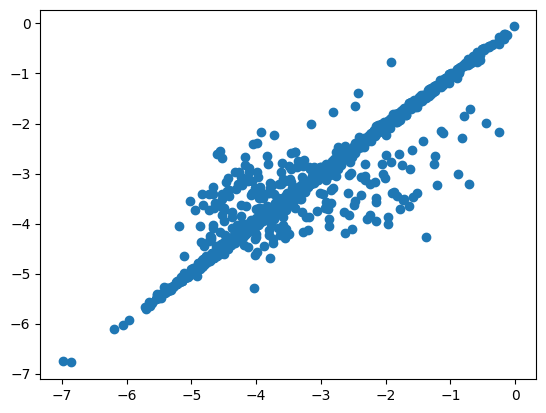

In [70]:
plt.scatter(trues, pred)